<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/PEA/Supervised%20Models/C2_Notebook_Regresiones_con_Regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresiones con Regularización**

In [ ]:
# Librerías útiles para el análisis

import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt
import io
import scipy.stats as scy
from scipy.stats import kurtosis

# Modelos de regresión

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Librerías para la visualización

import seaborn as sns
import matplotlib.pyplot as plt

# Métricas de evaluación

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

# Separar data de entrenamiento y test

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving demanda_data1.csv to demanda_data1.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded["demanda_data1.csv"]), encoding = "latin-1", sep = ",", parse_dates = ["tiempo"])

In [ ]:
dataset.head()

,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
0,2005-01-01,45.08,19.9,1,B,1,0.585294,0.0,0.0,0,0,381.0
1,2005-02-01,24.56,69.9,1,A,1,0.499286,0.0,0.0,0,0,320.0
2,2005-03-01,104.01,41.9,1,D,1,0.487209,0.0,0.0,0,0,464.0
3,2005-04-01,59.23,33.9,1,B,1,0.498529,0.0,0.0,0,0,408.0
4,2005-05-01,24.74,85.0,1,A,1,0.500000,0.0,0.0,0,0,321.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tiempo                    3847 non-null   datetime64[ns]
 1   Costo                     3847 non-null   float64       
 2   PrecioOfertaProm          3847 non-null   float64       
 3   NroTipoOfertas            3847 non-null   int64         
 4   Marca                     3847 non-null   object        
 5   CantOfertas               3847 non-null   int64         
 6   MaxDescuento%             3847 non-null   float64       
 7   minDescuento%             3847 non-null   float64       
 8   FactordeDescuentos        3847 non-null   float64       
 9   FlagCampana               3847 non-null   int64         
 10  TieneUbicacionEspecifica  3847 non-null   int64         
 11  UnidadesDemandas          3847 non-null   float64       
dtypes: datetime64[ns](1)

# **Análisis Exploratorio de Datos**

In [ ]:
dataset.describe()

,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
count,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000
mean,46.805753,51.156202,1.243566,1.049649,0.600289,0.076029,0.046798,0.002599,0.001560,363.859631
std,35.658520,30.549777,0.439466,0.251629,0.079967,0.150116,0.093907,0.050925,0.039467,84.086623
min,2.600000,8.000000,1.000000,0.000000,0.311250,0.000000,0.000000,0.000000,0.000000,97.000000
25%,22.430000,29.900000,1.000000,1.000000,0.540000,0.000000,0.000000,0.000000,0.000000,308.000000
50%,34.940000,39.900000,1.000000,1.000000,0.615753,0.000000,0.000000,0.000000,0.000000,365.000000
75%,62.765000,72.900000,1.000000,1.000000,0.656722,0.000000,0.000000,0.000000,0.000000,430.000000
max,237.400000,149.000000,3.000000,6.000000,0.810135,0.472632,0.347757,1.000000,1.000000,549.000000


<ipython-input-7-e2fa81afe91b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["UnidadesDemandas"], label="UnidadesDemandas")


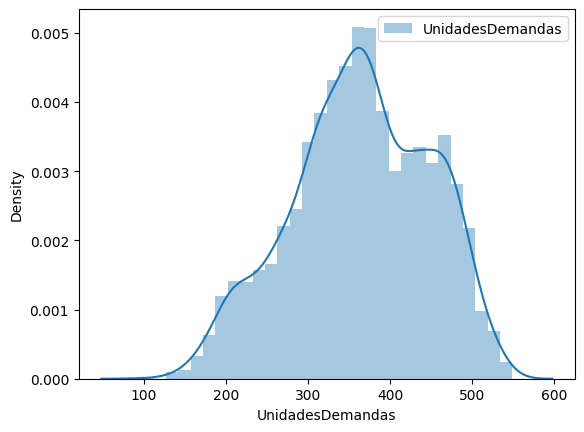

In [ ]:
sns.distplot(dataset["UnidadesDemandas"], label="UnidadesDemandas")
plt.legend()

<Axes: xlabel='UnidadesDemandas'>

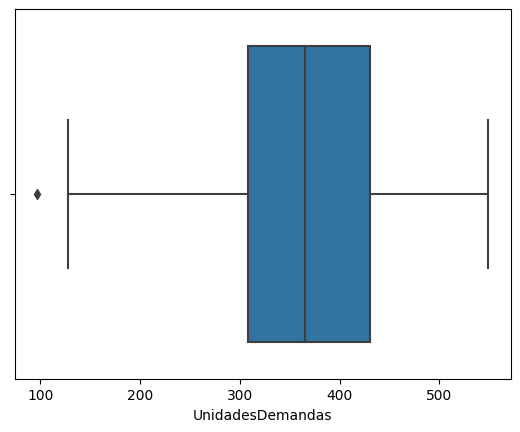

In [ ]:
sns.boxplot(x="UnidadesDemandas", data = dataset)

In [ ]:
dataset.corr()

<ipython-input-9-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
Costo,1.000000,-0.339035,0.299948,0.035572,-0.289330,0.300746,0.289623,0.016777,0.012119,0.618385
PrecioOfertaProm,-0.339035,1.000000,-0.140023,-0.044937,0.437895,-0.096167,-0.080010,-0.017475,0.036275,-0.647714
NroTipoOfertas,0.299948,-0.140023,1.000000,0.325604,0.178620,0.870888,0.873935,-0.028298,0.053048,0.444946
CantOfertas,0.035572,-0.044937,0.325604,1.000000,0.117528,-0.089300,-0.057575,-0.212983,0.018382,0.055874
MaxDescuento%,-0.289330,0.437895,0.178620,0.117528,1.000000,0.131808,0.173996,-0.126483,0.034499,-0.508387
minDescuento%,0.300746,-0.096167,0.870888,-0.089300,0.131808,1.000000,0.986648,0.110934,0.061622,0.437641
FactordeDescuentos,0.289623,-0.080010,0.873935,-0.057575,0.173996,0.986648,1.000000,-0.025444,0.067146,0.424075
FlagCampana,0.016777,-0.017475,-0.028298,-0.212983,-0.126483,0.110934,-0.025444,1.000000,-0.002018,0.026802
TieneUbicacionEspecifica,0.012119,0.036275,0.053048,0.018382,0.034499,0.061622,0.067146,-0.002018,1.000000,0.011505
UnidadesDemandas,0.618385,-0.647714,0.444946,0.055874,-0.508387,0.437641,0.424075,0.026802,0.011505,1.000000


<ipython-input-10-ec5622d5d22c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

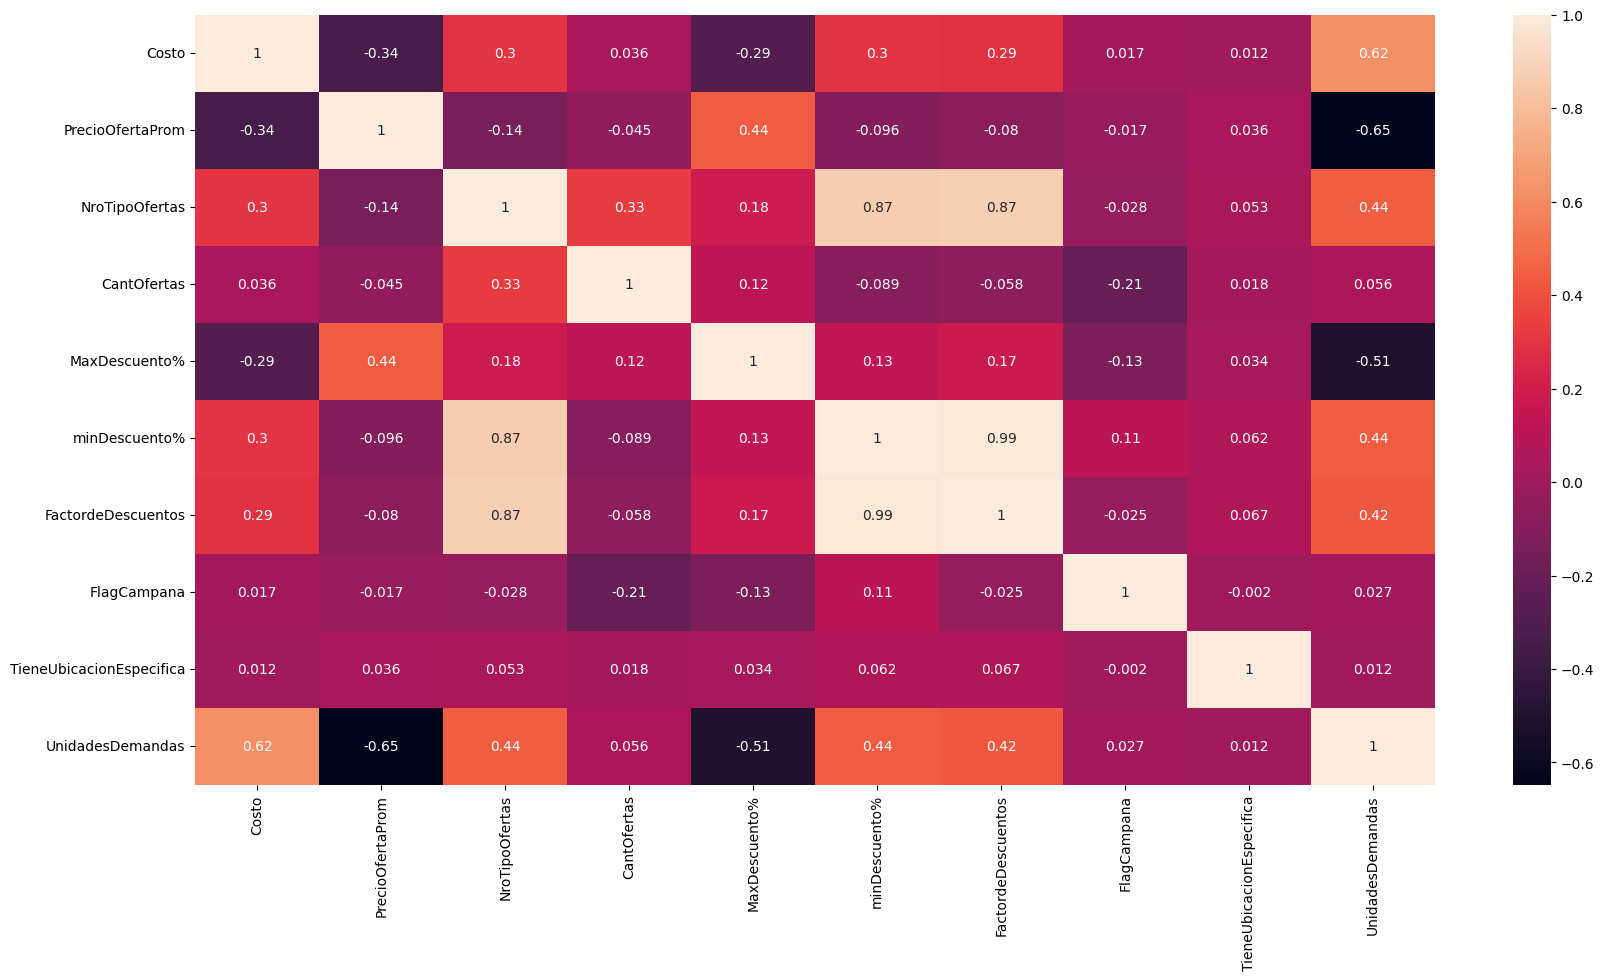

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), annot = True)

# **Preprocesamiento de data**

In [ ]:
data = pd.get_dummies(dataset, columns = ["Marca"])

In [ ]:
data.head()

,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas,Marca_A,Marca_B,Marca_C,Marca_D
0,2005-01-01,45.08,19.9,1,1,0.585294,0.0,0.0,0,0,381.0,0,1,0,0
1,2005-02-01,24.56,69.9,1,1,0.499286,0.0,0.0,0,0,320.0,1,0,0,0
2,2005-03-01,104.01,41.9,1,1,0.487209,0.0,0.0,0,0,464.0,0,0,0,1
3,2005-04-01,59.23,33.9,1,1,0.498529,0.0,0.0,0,0,408.0,0,1,0,0
4,2005-05-01,24.74,85.0,1,1,0.500000,0.0,0.0,0,0,321.0,1,0,0,0


# **Modelos de Regresión**

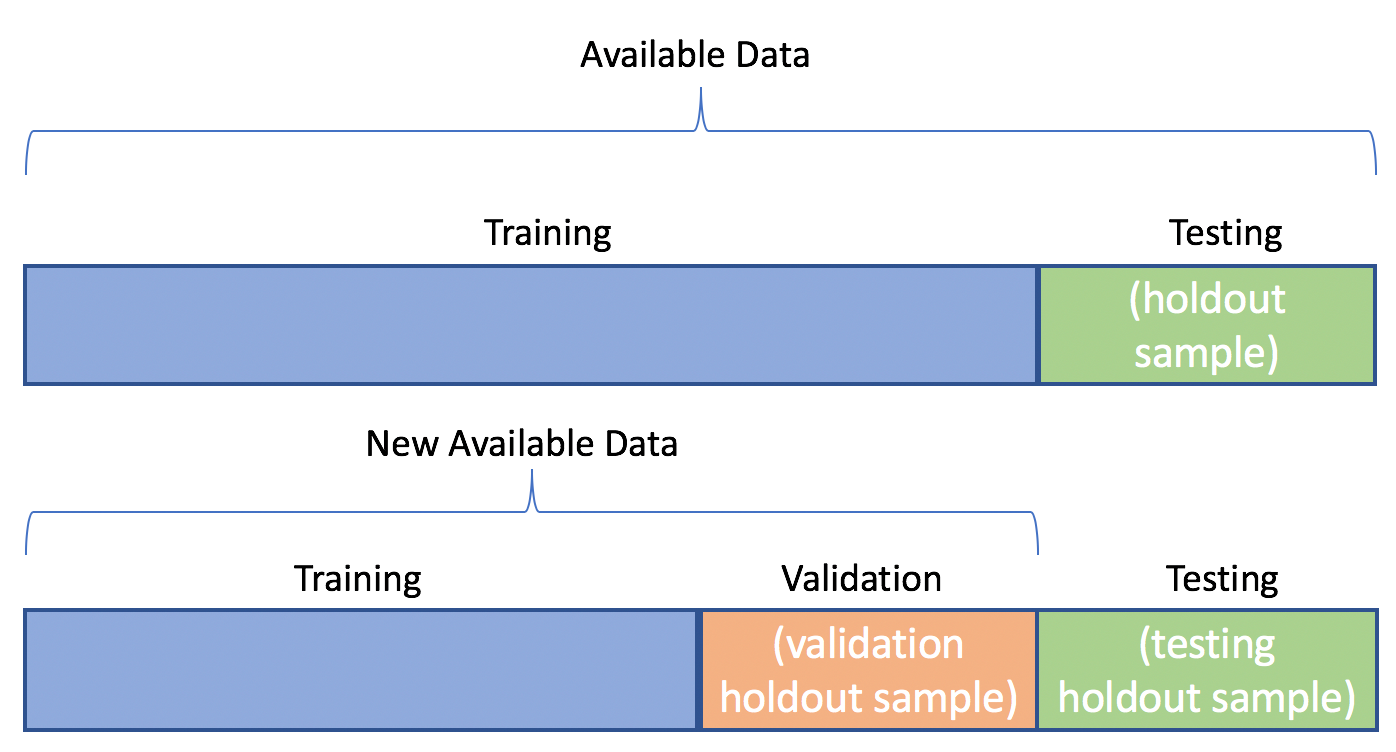

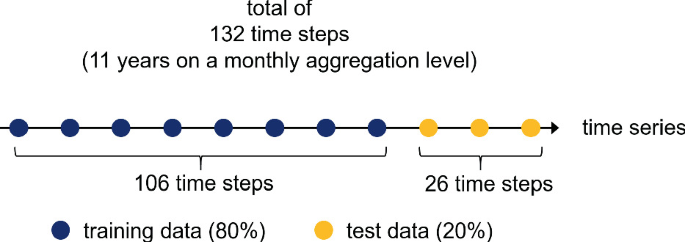

In [ ]:
dataset["tiempo"].min(), dataset["tiempo"].max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2015-12-07 00:00:00'))

In [ ]:
dataset["tiempo"].value_counts()

2005-01-01    1
2011-12-08    1
2012-11-01    1
2012-12-01    1
2012-01-13    1
             ..
2008-07-17    1
2008-07-18    1
2008-07-19    1
2008-07-20    1
2015-07-23    1
Name: tiempo, Length: 3847, dtype: int64

In [ ]:
X_train = data[dataset.tiempo < "2015-06-01"].drop(["UnidadesDemandas", "tiempo"], axis = 1)
X_test = data[dataset.tiempo >= "2015-06-01"].drop(["UnidadesDemandas", "tiempo"], axis = 1)
y_train = data[dataset.tiempo < "2015-06-01"][["UnidadesDemandas"]]
y_test = data[dataset.tiempo >= "2015-06-01"][["UnidadesDemandas"]]

In [ ]:
X_train.head()

,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,Marca_A,Marca_B,Marca_C,Marca_D
0,45.08,19.9,1,1,0.585294,0.0,0.0,0,0,0,1,0,0
1,24.56,69.9,1,1,0.499286,0.0,0.0,0,0,1,0,0,0
2,104.01,41.9,1,1,0.487209,0.0,0.0,0,0,0,0,0,1
3,59.23,33.9,1,1,0.498529,0.0,0.0,0,0,0,1,0,0
4,24.74,85.0,1,1,0.500000,0.0,0.0,0,0,1,0,0,0


In [ ]:
y_train.head()

,UnidadesDemandas
0,381.0
1,320.0
2,464.0
3,408.0
4,321.0


In [ ]:
# Segundo método con split aleatorio

# X = dataset.drop(["UnidadesDemandas", "tiempo"], axis = 1)
# y = dataset[["UnidadesDemandas"]]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

# **Modelo de Regresión Lineal Múltiple**

In [ ]:
M_R = sm.OLS(y_train, X_train).fit()

In [ ]:
M_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       UnidadesDemandas   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1568.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:19:09   Log-Likelihood:                -18668.
No. Observations:                3769   AIC:                         3.736e+04
Df Residuals:                    3756   BIC:                         3.744e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Costo                        0.5123      0.019     27.407      0.000       0.476       0.549
PrecioOfertaProm            -0.7610      0.022    -34.047      0.000      -0.805      -0.717
NroTipoOfertas              21.8738      4.722      4.633      0.000      12.616      31.131
CantOfertas                  1.6063      3.949      0.407      0.684      -6.136       9.349
MaxDescuento%             -253.7659      9.197    -27.593      0.000    -271.797    -235.735
minDescuento%             -257.8493     47.385     -5.442      0.000    -350.751    -164.947
FactordeDescuentos         530.8809     70.043      7.579      0.000     393.556     668.206
FlagCampana                 80.0836     20.827      3.845      0.000      39.249     120.918
TieneUbicacionEspecifica    14.7534     15.436      0.956      0.339     -15.511      45.018
Marca_A                    463.4547      5.854     79.172      0.000     451.978     474.932
Marca_B                    509.2793      5.554     91.699      0.000     498.390     520.168
Marca_C                    531.0776      5.636     94.232      0.000     520.028     542.127
Marca_D                    550.9245      5.688     96.854      0.000     539.772     562.077
==============================================================================
Omnibus:                      452.658   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.393
Skew:                           0.675   Prob(JB):                    1.17e-254
Kurtosis:                       5.371   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train.head()

,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,Marca_A,Marca_B,Marca_C,Marca_D
0,45.08,19.9,1,1,0.585294,0.0,0.0,0,0,0,1,0,0
1,24.56,69.9,1,1,0.499286,0.0,0.0,0,0,1,0,0,0
2,104.01,41.9,1,1,0.487209,0.0,0.0,0,0,0,0,0,1
3,59.23,33.9,1,1,0.498529,0.0,0.0,0,0,0,1,0,0
4,24.74,85.0,1,1,0.500000,0.0,0.0,0,0,1,0,0,0


In [ ]:
y_pred = M_R.predict(X_test)

In [ ]:
y_pred

3648    458.454077
3649    219.374303
3650    331.630449
3651    378.385508
3652    387.328254
           ...    
3842    396.649397
3843    304.771407
3844    383.651536
3845    307.778140
3846    449.607940
Length: 78, dtype: float64

In [ ]:
# Error absoluto medio

metrics.mean_absolute_error(y_test,y_pred)

29.832397521092005

In [ ]:
# Error cuadrático medio

metrics.mean_squared_error(y_test, y_pred)

1791.0501645618056

In [ ]:
# Raíz del error cuadrático medio

rmse_ols = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
rmse_ols

42.32080061343128

In [ ]:
# R2 del test

r2_ols = r2_score(y_test,y_pred)

In [ ]:
r2_ols

0.7631941675796764

In [ ]:
df_test = pd.concat([X_test,y_test], axis=1)

In [ ]:
df_test.head()

,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,Marca_A,Marca_B,Marca_C,Marca_D,UnidadesDemandas
3648,41.18,13.95,1,1,0.498214,0.0,0.0,0,0,0,0,0,1,472.0
3649,14.93,124.00,1,1,0.712644,0.0,0.0,0,0,1,0,0,0,221.0
3650,37.43,59.90,1,1,0.688506,0.0,0.0,0,0,0,1,0,0,351.0
3651,59.93,21.90,1,1,0.663636,0.0,0.0,0,0,0,1,0,0,359.0
3652,14.93,34.90,1,1,0.498571,0.0,0.0,0,0,0,1,0,0,376.0


In [ ]:
df_test["y_pred_lineal"] = y_pred

In [ ]:
df_test.head()

,Costo,PrecioOfertaProm,NroTipoOfertas,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,Marca_A,Marca_B,Marca_C,Marca_D,UnidadesDemandas,y_pred_lineal
3648,41.18,13.95,1,1,0.498214,0.0,0.0,0,0,0,0,0,1,472.0,458.454077
3649,14.93,124.00,1,1,0.712644,0.0,0.0,0,0,1,0,0,0,221.0,219.374303
3650,37.43,59.90,1,1,0.688506,0.0,0.0,0,0,0,1,0,0,351.0,331.630449
3651,59.93,21.90,1,1,0.663636,0.0,0.0,0,0,0,1,0,0,359.0,378.385508
3652,14.93,34.90,1,1,0.498571,0.0,0.0,0,0,0,1,0,0,376.0,387.328254


# **Modelos con Regularización**

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

**Ridge**

In [ ]:
modelo_RG = RidgeCV(
            alphas            = [1000,800,600,400, 200,100, 80, 60, 30, 15, 10, 9,8,7,6,5,1,0.1,0.01,0.005,0.0001,0.00005],
            fit_intercept    = True,
            store_cv_values  = True
            )

modelo_RG.fit(X = X_train, y = y_train)

RidgeCV(alphas=[1000, 800, 600, 400, 200, 100, 80, 60, 30, 15, 10, 9, 8, 7, 6,
                5, 1, 0.1, 0.01, 0.005, 0.0001, 5e-05],
        store_cv_values=True)

In [ ]:
modelo_RG

RidgeCV(alphas=[1000, 800, 600, 400, 200, 100, 80, 60, 30, 15, 10, 9, 8, 7, 6,
                5, 1, 0.1, 0.01, 0.005, 0.0001, 5e-05],
        store_cv_values=True)

In [ ]:
# El valor del alpha optimo

modelo_RG.alpha_

0.005

In [ ]:
predicciones = modelo_RG.predict(X=X_test)

In [ ]:
predicciones = predicciones.flatten()

In [ ]:
predicciones

array([458.39023883, 219.42446015, 331.70287488, 378.44425467,
       387.29332369, 384.09236636, 360.77443761, 224.14082104,
       322.54797165, 339.5746806 , 399.76689129, 319.90394589,
       502.80810368, 327.9946045 , 439.32870164, 458.34022672,
       358.50122235, 366.68553765, 504.72569432, 368.69995244,
       353.4540239 , 411.23872729, 212.1857862 , 368.84826362,
       447.08884719, 337.11472692, 259.57665188, 247.83495101,
       400.42875737, 367.53259955, 337.26148336, 263.86731862,
       450.01678519, 277.13191699, 384.1737675 , 442.07438739,
       265.08992391, 390.73924564, 314.162746  , 440.38487428,
       219.18326085, 413.58765561, 443.8533218 , 505.86722081,
       348.1556685 , 316.38792852, 514.32020573, 407.04119668,
       259.3743032 , 363.73871823, 354.81787051, 309.50058961,
       428.63809991, 260.27567143, 271.63555758, 302.73065677,
       475.68069747, 293.07591759, 430.72604211, 240.96566131,
       314.47088412, 425.51635845, 341.83217551, 420.77

In [ ]:
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, predicciones))

In [ ]:
rmse_ridge

42.31319863984595

In [ ]:
r2_ridge = r2_score(y_test, predicciones)

In [ ]:
r2_ridge

0.7632792335507821

In [ ]:
pd.Series(modelo_RG.coef_.ravel(), index = X_train.columns)

Costo                         0.512310
PrecioOfertaProm             -0.760981
NroTipoOfertas               21.652640
CantOfertas                   1.749550
MaxDescuento%              -253.208033
minDescuento%              -248.111662
FactordeDescuentos          516.204689
FlagCampana                  76.375438
TieneUbicacionEspecifica     14.812228
Marca_A                     -50.244889
Marca_B                      -4.384250
Marca_C                      17.397594
Marca_D                      37.231546
dtype: float64

**Lasso**

In [ ]:
modelo_LS = LassoCV(
            alphas = [1000,800,600,400, 200,100, 80, 60, 30, 15, 10, 9,8,7,6,5,1,0.1,0.01,0.005,0.0001,0.00005],
            cv = 10
)

modelo_LS.fit(X=X_train, y = y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27457.18252519332, tolerance: 2407.4807485554247
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29748.60918795038, tolerance: 2390.388513207547
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not

LassoCV(alphas=[1000, 800, 600, 400, 200, 100, 80, 60, 30, 15, 10, 9, 8, 7, 6,
                5, 1, 0.1, 0.01, 0.005, 0.0001, 5e-05],
        cv=10)

In [ ]:
# el valor optimo del alpha

modelo_LS.alpha_

0.0001

In [ ]:
# Mejor modelo alpha optimo LS

modelo_LS = Lasso(alpha = 0.00005)
modelo_LS.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.845e+05, tolerance: 2.660e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=5e-05)

In [ ]:
pd.Series(modelo_LS.coef_.ravel(), index = X_train.columns)

Costo                         0.512275
PrecioOfertaProm             -0.761006
NroTipoOfertas               21.828780
CantOfertas                   1.635008
MaxDescuento%              -253.688363
minDescuento%              -256.440616
FactordeDescuentos          528.820689
FlagCampana                  79.541415
TieneUbicacionEspecifica     14.723891
Marca_A                     -63.604369
Marca_B                     -17.774846
Marca_C                       4.020455
Marca_D                      23.865054
dtype: float64

In [ ]:
prediccionesLS = modelo_LS.predict(X=X_test)
prediccionesLS = prediccionesLS.flatten()

In [ ]:
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, prediccionesLS))

In [ ]:
rmse_lasso

42.31954565537639

In [ ]:
r2_lasso = r2_score(y_test, prediccionesLS)

In [ ]:
r2_lasso

0.763208211594738

**ElasticNet**

In [ ]:
modelo_EL = ElasticNetCV(
            l1_ratio = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas = [1000,800,600,400, 200,100, 80, 60, 30, 15, 10, 9,8,7,6,5,1,0.1,0.01,0.005,0.0001,0.00005],
            cv = 10
)

modelo_EL.fit(X = X_train, y = y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7929907.451376464, tolerance: 2407.4807485554247
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regu

ElasticNetCV(alphas=[1000, 800, 600, 400, 200, 100, 80, 60, 30, 15, 10, 9, 8, 7,
                     6, 5, 1, 0.1, 0.01, 0.005, 0.0001, 5e-05],
             cv=10, l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99])

In [ ]:
modelo_EL.alpha_

5e-05

In [ ]:
predicciones_EL = modelo_EL.predict(X = X_test)
predicciones_EL = predicciones_EL.flatten()

In [ ]:
rmse_elastic = np.sqrt(mean_squared_error(y_test,predicciones_EL))

In [ ]:
rmse_elastic

42.305925361556106

In [ ]:
r2_elastic = r2_score(y_test, predicciones_EL)

In [ ]:
r2_elastic

0.7633606071217167

In [ ]:
modelo_EL.coef_

array([   0.51235132,   -0.76097155,   21.4318449 ,    1.89158764,
       -252.67141373, -238.81678862,  502.23971333,   72.82987029,
         14.83153203,  -63.25400519,  -17.35865318,    4.40741049,
         24.22880013])

# **Comparación del mejor modelo en base al R2**

In [ ]:
# Comparamos los 4 modelos

df_comparacionr2 = pd.DataFrame({
    "modelo":["OLS","Ridge","Lasso","Elastic-net"],
    "r2-test":[r2_ols,r2_ridge,r2_lasso,r2_elastic]
})

In [ ]:
df_comparacionr2

,modelo,r2-test
0,OLS,0.763194
1,Ridge,0.763279
2,Lasso,0.763208
3,Elastic-net,0.763361


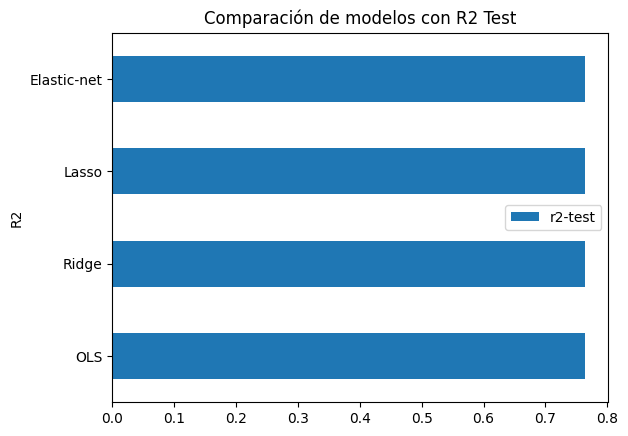

In [ ]:
ax = df_comparacionr2.set_index("modelo").plot(kind="barh", title = "Comparación de modelos con R2 Test")
ax.set_ylabel("R2")
ax.get_legend()

**Comparación en base al RMSE**

In [ ]:
df_comparacionrmse = pd.DataFrame({
    "modelo":["OLS","Ridge","Lasso","Elastic-net"],
    "rmse-test":[rmse_ols,rmse_ridge,rmse_lasso,rmse_elastic]
})

In [ ]:
df_comparacionrmse

,modelo,rmse-test
0,OLS,42.320801
1,Ridge,42.313199
2,Lasso,42.319546
3,Elastic-net,42.305925
